**1. Read the dataset**

**1.1.Import important python libraries**
import some important python libraries which is used for data analysis, data preprocessing etc. 

In [ ]:
!pip install scikeras[tensorflow]

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold
from google.colab import drive
import os
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from time import time as tt
from scipy import stats
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model

###**1.2 Analysing data**

In [7]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/OPTION1_uk_road_accident_2019_coursework_final.csv')
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
data.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


Check for a sample of the dataset  to get an overall idea about how the values are distributed in the dataset

In [18]:
data.sample(10)

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
29268,2019340s02301,60,daylight,fine,dry,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,51.0,serious
23136,20191365f0348,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,slight
20029,2019010183203,40,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,21.0,serious
2071,2019970913900,30,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,77.0,slight
7230,2019070578079,30,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,no impact,male and female,23.0,slight
9045,2019340s08221,70,darkness,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,52.0,fatal
8237,2019440303931,30,daylight,fine,dry,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,53.0,serious
31063,2019040809126,30,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,NaN,slight
1624,2019140904597,60,daylight,fog or mist,dry,at least one biped,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,42.0,serious
10114,2019010220744,20,darkness,data missing or out of range,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,37.0,slight


In [19]:
data.shape

(31647, 14)

##**2. Exploratory data analysis**

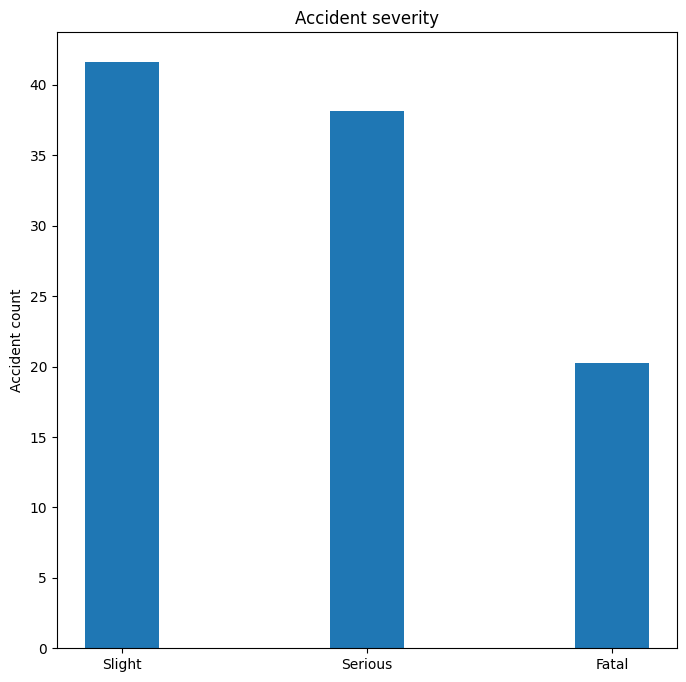

In [20]:
# create bar chart of accident severity variable
plt.figure(figsize=(8,8))

data['accident_severity'].replace({'serious':'Serious','fatal':'Fatal','slight':'Slight'},inplace=True)

severity=data['accident_severity'].value_counts(normalize=True)
plt.bar(np.arange(severity.shape[0]),severity.values*100,width=0.3)
plt.xticks(np.arange(severity.shape[0]),severity.index)
plt.ylabel("Accident count")
plt.title("Accident severity")
plt.show()

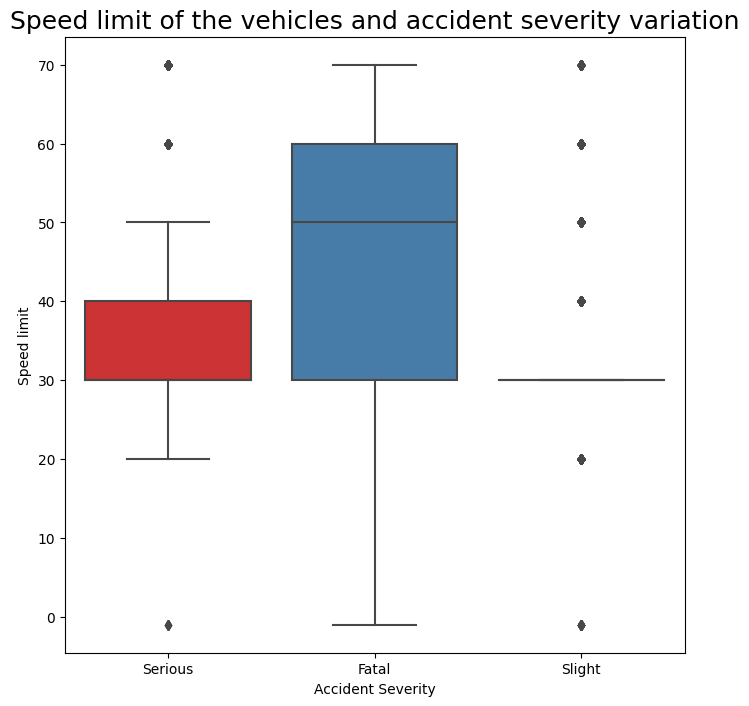

In [21]:
# create box plot of age by accident severity level
plt.figure(figsize=(8,8))
sns.boxplot(x='accident_severity', y='speed_limit', data=data,palette="Set1")
plt.xlabel('Accident Severity')
plt.ylabel('Speed limit')
plt.title("Speed limit of the vehicles and accident severity variation",fontsize=18)
plt.show()

In [22]:
data[data['accident_severity']=='Slight'].mean()

<ipython-input-22-6c82618bd37a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[data['accident_severity']=='Slight'].mean()


speed_limit             32.145063
age_of_oldest_driver    48.304425
dtype: float64

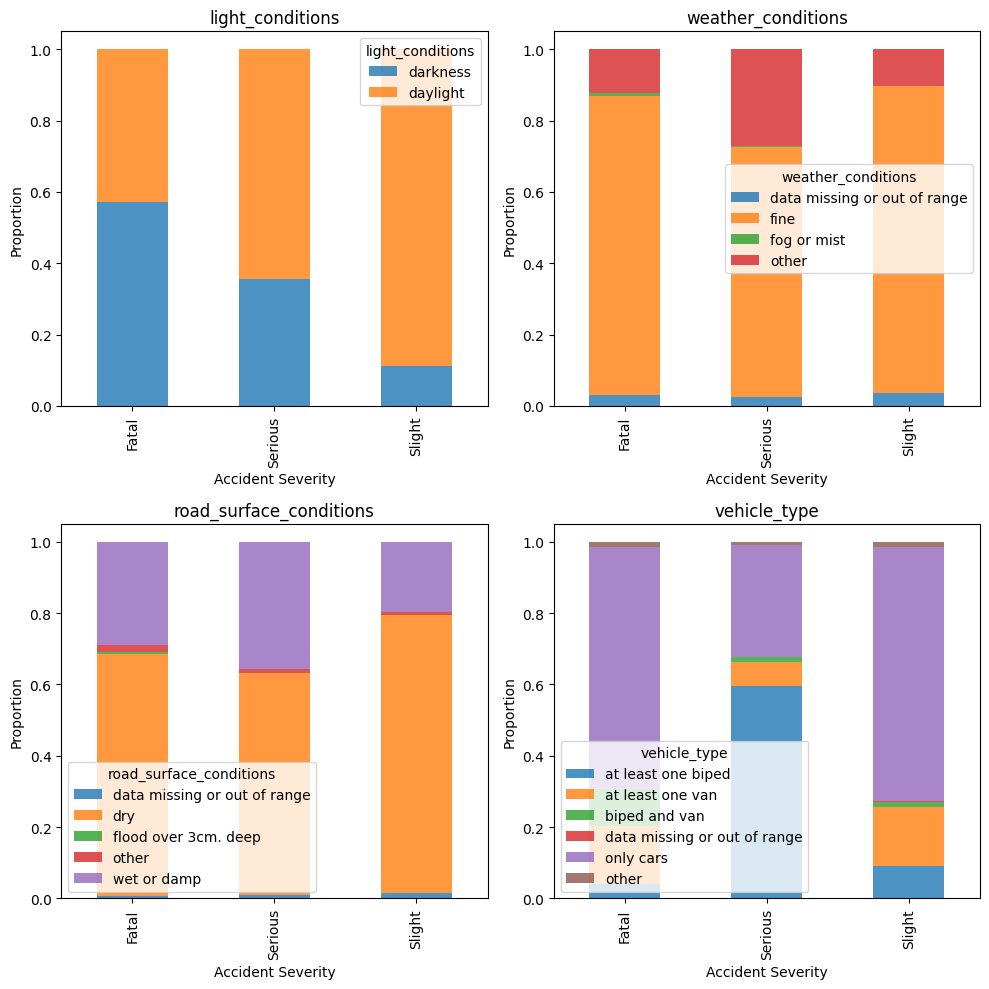

In [23]:
cols=['light_conditions', 'weather_conditions', 'road_surface_conditions', 'vehicle_type']
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    cross_tab_prop = pd.crosstab(index=data['accident_severity'], columns=data[cols[i]], normalize="index")
    cross_tab_prop.plot(kind='bar', stacked=True, ax=ax,alpha=0.8)
    ax.set_title(cols[i])
    ax.set_xlabel('Accident Severity')
    ax.set_ylabel('Proportion')


plt.tight_layout()
plt.show()

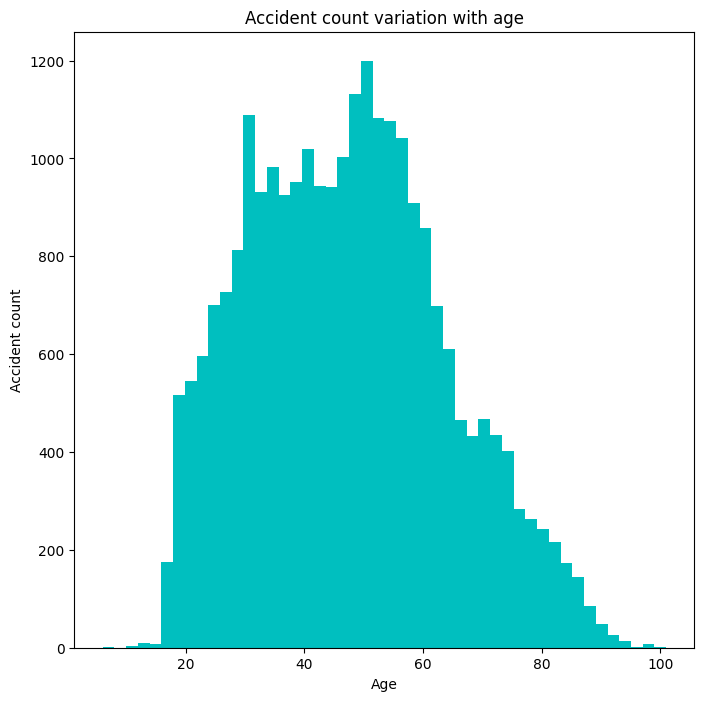

In [24]:
# create histogram of age variable#
plt.figure(figsize=(8,8))
binsize=2
bins=int(round(((data['age_of_oldest_driver'].max()-data['age_of_oldest_driver'].min())/binsize),0))
plt.hist(data['age_of_oldest_driver'], bins=bins,color='c')
plt.xlabel('Age')
plt.ylabel('Accident count')
plt.title('Accident count variation with age')
plt.show()



assigning the train and test datasets to 2 vectors named 


1.   feature_dataset - Including all the columns of the dataframe 'data' except 'accident_index' which doesnt convey any information and 'accident_severity' which is the label variable
2.   label_dataset - including the label variable 'accident_severity'



In [25]:
feature_dataset=data.iloc[:,1:-1] 
label_dataset=data['accident_severity']

In [26]:
print(f"The shape of the feature dataset:  {feature_dataset.shape}")
print(f"The shape of label dataset:  {label_dataset.shape}")

The shape of the feature dataset:  (31647, 12)
The shape of label dataset:  (31647,)


In [27]:
# list of features 
print(feature_dataset.columns)

Index(['speed_limit', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'vehicle_type', 'junction_location',
       'skidding_and_overturning', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver',
       'age_of_oldest_driver'],
      dtype='object')


In [28]:
# list of data types in each feature and label datasets
print(feature_dataset.dtypes)
print()
print(label_dataset.dtypes)

speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
dtype: object

object


In [29]:
# Summary statistics for numerical features in the dataset 
# 1. speed_limit 
# 2. age_of_oldest_driver
data.describe()

,speed_limit,age_of_oldest_driver
count,31647.000000,25197.000000
mean,36.572029,47.254038
std,13.837362,16.779656
min,-1.000000,6.000000
25%,30.000000,34.000000
50%,30.000000,47.000000
75%,40.000000,59.000000
max,70.000000,101.000000


In [30]:
#checking for duplicates
#data=data.drop_duplicates()
data.duplicated().sum()

1172

###**comments**
It can be seen that some data cleansing should be done since some values are not acceptable


*   Minimum speed recorded is -1 
*   Minimum age of a driver mentioned to be 6 years



In [31]:
# Select only the categorical columns in the feature_dataset
cat_cols = feature_dataset.select_dtypes(include=['object']).columns

#now check what are the catefories and values per each category in the above cataegorical columns


for col in cat_cols:
  print(f"Categories and number of occurrences for '{col}' \n")
  display(HTML(pd.DataFrame(feature_dataset[col].value_counts(normalize=True)).to_html()))
  print("-"*50)

print("Categories and number of occurrences for label_dataset  \n")
display(HTML(pd.DataFrame(label_dataset.value_counts(normalize=True)).to_html()))

Categories and number of occurrences for 'light_conditions' 



,light_conditions
daylight,0.701804
darkness,0.298196


--------------------------------------------------
Categories and number of occurrences for 'weather_conditions' 



,weather_conditions
fine,0.794767
other,0.170853
data missing or out of range,0.030651
fog or mist,0.003729


--------------------------------------------------
Categories and number of occurrences for 'road_surface_conditions' 



,road_surface_conditions
dry,0.698076
wet or damp,0.276835
other,0.011818
data missing or out of range,0.011533
flood over 3cm. deep,0.001738


--------------------------------------------------
Categories and number of occurrences for 'vehicle_type' 



,vehicle_type
only cars,0.552564
at least one biped,0.273707
at least one van,0.127658
biped and van,0.031599
other,0.012481
data missing or out of range,0.001991


--------------------------------------------------
Categories and number of occurrences for 'junction_location' 



,junction_location
at or within 20 metres of junction,0.543622
not at or within 20 metres of junction,0.409928
data missing or out of range,0.046450


--------------------------------------------------
Categories and number of occurrences for 'skidding_and_overturning' 



,skidding_and_overturning
no skidding or overturning,0.770594
at least one vehicle skidded or overturned,0.165134
data missing or out of range,0.064271


--------------------------------------------------
Categories and number of occurrences for 'vehicle_leaving_carriageway' 



,vehicle_leaving_carriageway
none leaving carriageway,0.758966
at least one vehicle leaving carriageway,0.178880
data missing or out of range,0.062154


--------------------------------------------------
Categories and number of occurrences for 'hit_object_off_carriageway' 



,hit_object_off_carriageway
none hit an object,0.825639
at least one vehicle hit an object,0.115493
data missing or out of range,0.058868


--------------------------------------------------
Categories and number of occurrences for 'first_point_of_impact' 



,first_point_of_impact
at least one vehicle with frontal impact,0.726830
other points of impact,0.189844
no impact,0.042121
data missing or out of range,0.041205


--------------------------------------------------
Categories and number of occurrences for 'sex_of_driver' 



,sex_of_driver
all males,0.489588
male and female,0.221664
data missing or out of range,0.161848
all females,0.126900


--------------------------------------------------
Categories and number of occurrences for label_dataset  



,accident_severity
Slight,0.416440
Serious,0.381198
Fatal,0.202363


#####**Check for missing data**

In [32]:
print(f"Missing values in the feature_dataset : {feature_dataset.isna().sum()}")
print()

print(f"Missing values in the label_dataset : {label_dataset.isna().sum()}")
print(label_dataset.isna().sum())

Missing values in the feature_dataset : speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
dtype: int64

Missing values in the label_dataset : 1172
1172


It can be seen that there are some missing records in the column 'age_of_oldest_driver' of the feature_dataset and also in the label_dataset as well. 

Observations by looking at the results above



1.   Classes are heavily imbalanced 

*   This can be seen for most of the other categorical features as well like 'light condition', 'weather condition', 'road_surface_condition'


2.   Many missing data points can be observed which are mentioned to be 'data missing or out of range'. Need to replace them or drop these records through imputation methods such as mean or mode imputation

3.  Many of the features in the dataset are categorical. These categorical features will need to be encoded before they can be used in machine learning models.

4. in the label_dataset, data points for the categories 'Serious' and 'serious' can be categorized under single category of 'Serious' since they mean the same. This can be done for and 'Fatal','fatal' categories and 'Slight','slight' categories.

5. There are null values and duplicates values in both label_dataset and feature_dataset

In [33]:
data.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,Serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,Fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,Serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,Serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,Slight


##**3. Data Preprocessing**

In [34]:
data.shape

(31647, 14)

In [35]:
#dropping duplicates
data=data.drop_duplicates()
data.shape

(30475, 14)

In the above scenario the target variable or the label_dataset contains 1172 missing values and also it has a considerable class imbalance. Considering the class imbalance in the stage of train_test_split, stratified sampling should be applied ton maintain the same class percentages in the train and test datasets. But this is imposssible to be done while having missing values. 

Considering the percentage of missing values which is 3% (=1172/31647) it seems ok to drop those rows. 

In [36]:
data = data.dropna(subset=['accident_severity'])
feature_dataset=data.iloc[:,1:-1] 
label_dataset=data['accident_severity']

In [37]:
print(data.shape)

(29303, 14)


###**3.1 train test validation split**

In [38]:
# Split data into training and testing sets
x_train_val, x_test, y_train_val, y_test = train_test_split(feature_dataset, label_dataset, test_size=0.2,random_state=42,stratify=label_dataset)


# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1, random_state=42,stratify=y_train_val)

# Check the shapes of the resulting sets
print(f"Training set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Testing set: {x_test.shape}, {y_test.shape}")

Training set: (21097, 12), (21097,)
Validation set: (2345, 12), (2345,)
Testing set: (5861, 12), (5861,)


###**3.2. Other data preprocessing activities**

Need to ensure to perform data preprocessing steps such as imputation separately on the training and testing sets. This ensures that no information from the testing set is used to inform the training set. In practice, it is possible to fit the imputer only on the training set and use it to transform both the training and testing sets.
The important thing is that you fit the imputer only on the training set and then you transform both training and evaluation sets. This is because with your evaluation you want to simulate a situation as real as possible (i.g. what happens when you have truly unseen data



In [39]:
pd.DataFrame(y_test.value_counts())

,accident_severity
Slight,2438
Serious,2236
Fatal,1187


In [27]:
# label_dataset.replace({'serious':'Serious','fatal':'Fatal','slight':'Slight'},inplace=True)

# print("Categories and number of occurrences for label_dataset  \n")
# display(HTML(pd.DataFrame(label_dataset.value_counts()).to_html()))

### **Numerical column encoding**

In [40]:
numerical_imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

#fit the imputer to the 'age_of_oldest_driver' column to calculate the average
numerical_imputer=numerical_imputer.fit(x_train[['age_of_oldest_driver']])

#Call Transform to replace missing data in train_dataset by mean
x_train['age_of_oldest_driver']=numerical_imputer.transform(x_train[['age_of_oldest_driver']])
x_test['age_of_oldest_driver']=numerical_imputer.transform(x_test[['age_of_oldest_driver']])
x_val['age_of_oldest_driver']=numerical_imputer.transform(x_val[['age_of_oldest_driver']])

#checking whether any missing values in the x_train and x_test
print(x_train.isnull().sum())
print(x_test.isnull().sum())


speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
dtype: int64
speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
dtype: int64


### **Categorical column handling missing values**



In [41]:
missing_val_frame=pd.DataFrame((x_train=='data missing or out of range').astype(int).sum(axis=0), columns=['missing_val_count'])
features_with_missing_val=missing_val_frame.loc[missing_val_frame['missing_val_count']>0].index

#Since the number of samples with 'data missing or out of range' is very low compared to the other categories, 
#ther will be a minimum impact to the class balance if those values are replaced with the mode.
#Hence use the simple imputer with strategy='most_frequent'

categorical_imputer=SimpleImputer(missing_values='data missing or out of range',strategy='most_frequent')
categorical_imputer.fit(x_train[features_with_missing_val])

x_train[features_with_missing_val]=categorical_imputer.fit_transform(x_train[features_with_missing_val])
x_test[features_with_missing_val]=categorical_imputer.transform(x_test[features_with_missing_val])
x_val[features_with_missing_val]=categorical_imputer.transform(x_val[features_with_missing_val])

print((x_train=='data missing or out of range').astype(int).sum(axis=0))
print((x_test=='data missing or out of range').astype(int).sum(axis=0))



speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
dtype: int64
speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
dtype: int64


###**Feature scaling for the numerical values**

In [42]:
scalar=StandardScaler()
x_train[['speed_limit',	'age_of_oldest_driver']]=scalar.fit_transform(x_train[['speed_limit',	'age_of_oldest_driver']])
x_test[['speed_limit',	'age_of_oldest_driver']]=scalar.transform(x_test[['speed_limit',	'age_of_oldest_driver']])
x_val[['speed_limit',	'age_of_oldest_driver']]=scalar.transform(x_val[['speed_limit',	'age_of_oldest_driver']])

x_train[['speed_limit',	'age_of_oldest_driver']].sample(5)

,speed_limit,age_of_oldest_driver
29832,-0.478127,-0.612476
25661,-0.478127,0.000000
13407,0.244788,0.000000
6121,0.244788,1.389599
2547,-0.478127,-1.146363


###**Feature encoding for categorical variables**

In [43]:
#one hot encosing for the categorical variables

ct_cat = ColumnTransformer([("onehot", OneHotEncoder(),cat_cols), ], remainder="passthrough", verbose_feature_names_out=False)
encoded_array_train= ct_cat.fit_transform(x_train) 
encoded_col_names= ct_cat.get_feature_names_out()
x_train_tf = pd.DataFrame(encoded_array_train, columns=encoded_col_names)


encoded_array_test= ct_cat.transform(x_test) 
encoded_col_names= ct_cat.get_feature_names_out()
x_test_tf = pd.DataFrame(encoded_array_test, columns=encoded_col_names)

encoded_array_val= ct_cat.transform(x_val) 
encoded_col_names= ct_cat.get_feature_names_out()
x_val_tf = pd.DataFrame(encoded_array_val, columns=encoded_col_names)

### **label encoding for target variable**

In [44]:
# create an object of the LabelEncoder class
labelEncoder = LabelEncoder() 


# apply LblEncoder object to y_train
y_train_tf = labelEncoder.fit_transform(y_train)

# apply LblEncoder object to y_test
y_test_tf = labelEncoder.transform(y_test)

# apply LblEncoder object to y_val
y_val_tf = labelEncoder.transform(y_val)

###**Final dataset ready**

In [45]:
print("Transformed feature dataset head")
display(HTML(x_train_tf.head().to_html()))
print()
print("Transformed label dataset head")
display(HTML(pd.DataFrame(y_train_tf).head().to_html()))


Transformed feature dataset head


,light_conditions_darkness,light_conditions_daylight,weather_conditions_fine,weather_conditions_fog or mist,weather_conditions_other,road_surface_conditions_dry,road_surface_conditions_flood over 3cm. deep,road_surface_conditions_other,road_surface_conditions_wet or damp,vehicle_type_at least one biped,vehicle_type_at least one van,vehicle_type_biped and van,vehicle_type_only cars,vehicle_type_other,junction_location_at or within 20 metres of junction,junction_location_not at or within 20 metres of junction,skidding_and_overturning_at least one vehicle skidded or overturned,skidding_and_overturning_no skidding or overturning,vehicle_leaving_carriageway_at least one vehicle leaving carriageway,vehicle_leaving_carriageway_none leaving carriageway,hit_object_off_carriageway_at least one vehicle hit an object,hit_object_off_carriageway_none hit an object,first_point_of_impact_at least one vehicle with frontal impact,first_point_of_impact_no impact,first_point_of_impact_other points of impact,sex_of_driver_all females,sex_of_driver_all males,sex_of_driver_male and female,speed_limit,age_of_oldest_driver
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.244788,-0.011853
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.201042,-0.212061
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.690618,-0.879419
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.690618,-0.612476
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.478127,0.000000



Transformed label dataset head


,0
0,1
1,2
2,0
3,1
4,1


### **Visualizing the data in a 2D plot**

<ipython-input-95-27886ad504ed>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab10")(np.linspace(0,1,len(classes_)))


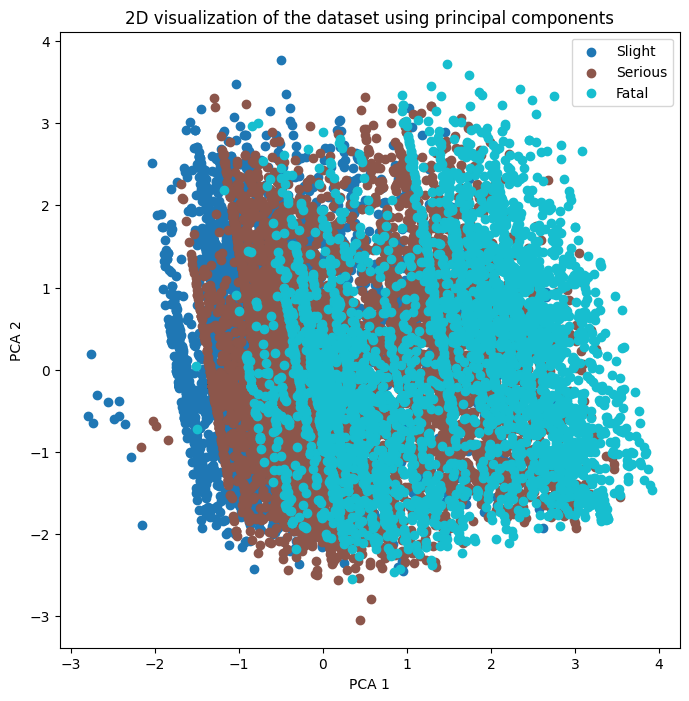

In [95]:

train_data_viz=pd.concat([x_train_tf,pd.DataFrame(y_train_tf,columns=['Target'])], axis=1)
pca_viz = PCA(n_components=2)
pca_viz_transform = pca_viz.fit_transform(train_data_viz) 
classes_ = train_data_viz['Target'].value_counts().index
i=0
# let's get 3 different colors to recognize the different classes
from matplotlib import cm 
colors = cm.get_cmap("tab10")(np.linspace(0,1,len(classes_)))
class_name=['Slight','Serious','Fatal']
plt.figure(figsize=(8,8))
for target_class,color in zip(classes_, colors):
    # let's only plot the transformed data points for a given label
    plt.scatter(pca_viz_transform[train_data_viz['Target']==target_class,0],
                pca_viz_transform[train_data_viz['Target']==target_class,1],
                label=class_name[i],
                color=color)
    i=i+1
plt.legend()
plt.ylabel('PCA 2')
plt.xlabel('PCA 1')
plt.title('2D visualization of the dataset using principal components',fontsize=12)
plt.show()

In [92]:
classes_

Int64Index([2, 1, 0], dtype='int64')

## **4. ML Model building using traditional classifiers**

###**Using the SGDClassifier**

0.7819747352511678 {'classifier__class_weight': 'balanced', 'classifier__eta0': 0.001, 'classifier__learning_rate': 'constant', 'classifier__loss': 'squared_hinge', 'classifier__penalty': 'l1'}
Validation score: 0.7877649861654566
              precision    recall  f1-score   support

      Slight       0.60      0.89      0.72      1187
     Serious       0.80      0.69      0.74      2236
       Fatal       0.84      0.75      0.80      2438

    accuracy                           0.76      5861
   macro avg       0.75      0.78      0.75      5861
weighted avg       0.78      0.76      0.76      5861


 Balanced accuracy is 0.7775358306543533


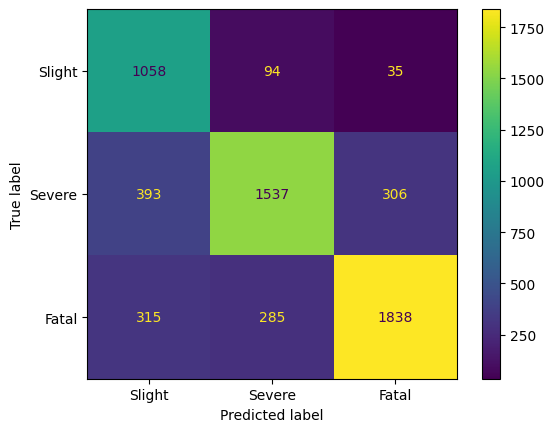

In [ ]:
#Model 1 - pipe 1
#resampling technique - RandomOversampler
#classifier - SGDClassifier

pipe1 = ImbPipeline(
        steps =[ ('resampling', RandomOverSampler(random_state=0)),
          ('classifier', SGDClassifier(random_state=0))
      ]
    )

# define the parameters 
parameters = {
              'classifier__eta0': np.logspace(-5,-1,3), # eta=array([1.e-05, 1.e-03, 1.e-01])
              'classifier__learning_rate': ['constant'],
              'classifier__class_weight': ['balanced', None],
              'classifier__loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
              'classifier__penalty':['l2','l1']
             }


# create the GridSearch function
clf_search1 = GridSearchCV(pipe1, parameters, scoring= "balanced_accuracy", cv= 5)

_ =clf_search1.fit(x_train_tf, y_train_tf)
print(clf_search1.best_score_, clf_search1.best_params_)

val_score = clf_search1.score(x_val_tf, y_val_tf)
print("Validation score:", val_score)

best_clf1 = clf_search1.best_estimator_
y_pred = best_clf1.predict(x_test_tf)
print(classification_report(y_test_tf, y_pred, target_names = severity.index))
SGD=classification_report(y_test_tf, y_pred, target_names = severity.index)
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, y_pred)}')

cm= ConfusionMatrixDisplay.from_estimator(best_clf1, x_test_tf, y_test_tf,display_labels=['Slight', 'Severe', 'Fatal'])

### **Using the descision trees**

0.7940903160199592 {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Validation score: 0.7958889919254517
              precision    recall  f1-score   support

      Slight       0.61      0.91      0.73      1187
     Serious       0.81      0.70      0.75      2236
       Fatal       0.85      0.76      0.80      2438

    accuracy                           0.77      5861
   macro avg       0.76      0.79      0.76      5861
weighted avg       0.79      0.77      0.77      5861


 Balanced accuracy is 0.7897122228819997


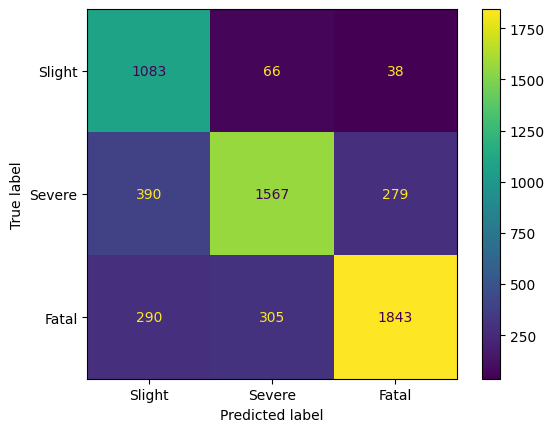

In [46]:
#Model 2 - pipe 2
#resampling technique - RandomOversampler
#classifier - DecisionTreeClassifier

pipe2 = ImbPipeline(
        steps =[ ('resampling', RandomOverSampler(random_state=0)),
          ('classifier', DecisionTreeClassifier(random_state=0))
      ]
    )

# define the parameters 
parameters = {
              'classifier__criterion': ['gini', 'entropy', 'log_loss'],
              'classifier__max_depth': stats.randint(low=1, high= 20),
              'classifier__class_weight': ['balanced', None],
              'classifier__min_samples_split' : stats.randint(low=2, high= 3)
             }


# create the GridSearch function
clf_search2 = RandomizedSearchCV(pipe2, parameters, scoring= "balanced_accuracy", cv= 5,random_state=0)

_ =clf_search2.fit(x_train_tf, y_train_tf)
print(clf_search2.best_score_, clf_search2.best_params_)

val_score = clf_search2.score(x_val_tf, y_val_tf)
print("Validation score:", val_score)

best_clf2 = clf_search2.best_estimator_
y_pred = best_clf2.predict(x_test_tf)
print(classification_report(y_test_tf, y_pred, target_names = severity.index))
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, y_pred)}')
tree=classification_report(y_test_tf, y_pred, target_names = severity.index)
cm= ConfusionMatrixDisplay.from_estimator(best_clf2, x_test_tf, y_test_tf,display_labels=['Slight', 'Severe', 'Fatal'])

### **USing Linear SVM classifiers**

0.7790290564819929 {'classifier__penalty': 'l1', 'classifier__class_weight': 'balanced', 'classifier__C': 3}
Validation score: 0.7860158776830343
              precision    recall  f1-score   support

      Slight       0.61      0.87      0.72      1187
     Serious       0.80      0.69      0.74      2236
       Fatal       0.84      0.76      0.80      2438

    accuracy                           0.76      5861
   macro avg       0.75      0.78      0.75      5861
weighted avg       0.78      0.76      0.76      5861


 Balanced accuracy is 0.7759882223438029


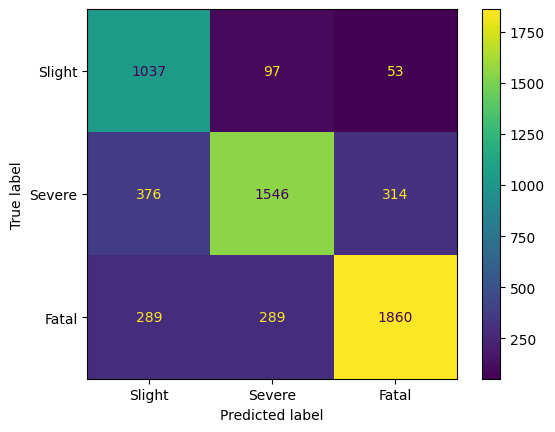

In [53]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#Model 4 - pipe 4
#resampling technique - RandomOversampler
#classifier - linearSVC
pipe4 = ImbPipeline(
        steps =[ ('resampling', RandomOverSampler(random_state=0)),
          ('classifier', LinearSVC(random_state=0,max_iter=1000,dual=False))
      ]
    )

# define the parameters 
parameters = {
              
              'classifier__penalty': ['l1','l2'],
              'classifier__C': [0.1,0.5,3,10],
              'classifier__class_weight': ['balanced', None]
             
             }

# create the GridSearch function
clf_search4 = RandomizedSearchCV(pipe4, parameters, scoring= "balanced_accuracy", cv= 5,random_state=0)

_ =clf_search4.fit(x_train_tf, y_train_tf)
print(clf_search4.best_score_, clf_search4.best_params_)

val_score = clf_search4.score(x_val_tf, y_val_tf)
print("Validation score:", val_score)

best_clf4 = clf_search4.best_estimator_
y_pred = best_clf4.predict(x_test_tf)
print(classification_report(y_test_tf, y_pred, target_names = severity.index))
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, y_pred)}')
SVM=classification_report(y_test_tf, y_pred, target_names = severity.index)
cm= ConfusionMatrixDisplay.from_estimator(best_clf4, x_test_tf, y_test_tf,display_labels=['Slight', 'Severe', 'Fatal'])

### **Using NearestNeighbors**

0.7832033503128926 {'classifier__n_neighbors': 50, 'classifier__weights': 'uniform'}
Validation score: 0.7907593794685827
              precision    recall  f1-score   support

      Slight       0.59      0.92      0.72      1187
     Serious       0.81      0.69      0.75      2236
       Fatal       0.86      0.74      0.80      2438

    accuracy                           0.76      5861
   macro avg       0.75      0.78      0.75      5861
weighted avg       0.79      0.76      0.76      5861


 Balanced accuracy is 0.784433298139562


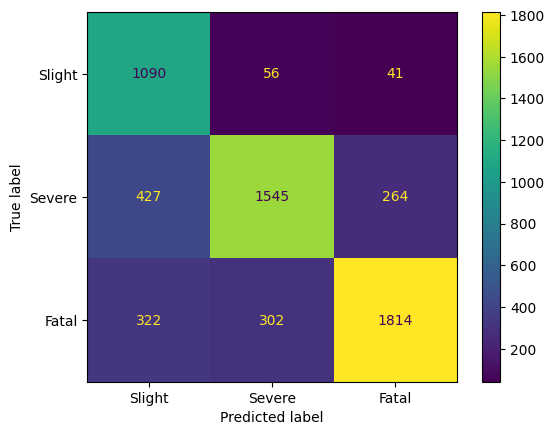

In [ ]:
#Model 5 - pipe 5
#resampling technique - RandomOversampler
#classifier - NearestNeighbors
pipe5 = ImbPipeline(
        steps =[ ('resampling', RandomOverSampler(random_state=0)),
          ('classifier', KNeighborsClassifier())
      ]
    )

# define the parameters 
parameters = {
              'classifier__weights' : ['uniform', 'distance'],
              'classifier__n_neighbors': [10,20,50,100]
            
             
             }

# create the GridSearch function
clf_search5 = GridSearchCV(pipe5, parameters, scoring= "balanced_accuracy", cv= 5)

_ =clf_search5.fit(x_train_tf, y_train_tf)
print(clf_search5.best_score_, clf_search5.best_params_)

val_score = clf_search5.score(x_val_tf, y_val_tf)
print("Validation score:", val_score)

best_clf5 = clf_search5.best_estimator_
y_pred = best_clf5.predict(x_test_tf)
print(classification_report(y_test_tf, y_pred, target_names = severity.index))
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, y_pred)}')
KNN=classification_report(y_test_tf, y_pred, target_names = severity.index)
cm= ConfusionMatrixDisplay.from_estimator(best_clf5, x_test_tf, y_test_tf,display_labels=['Slight', 'Severe', 'Fatal'])

### **Using the random forests**

###**Model 1**

In [54]:

pipe3_Rand = ImbPipeline(
        steps =[ ('resampling', RandomOverSampler(random_state=0)),
          ('classifier', RandomForestClassifier(random_state=0,class_weight='balanced'))
      ]
    )

# define the parameters 
parameters_set1 = {
              'classifier__criterion': ['gini', 'entropy', 'log_loss'],
              'classifier__n_estimators': stats.randint(low=100, high= 1000),
              'classifier__max_depth' : stats.randint(low=1, high= 20)
             }


# create the GridSearch function
clf_search3_Rand_1 = RandomizedSearchCV(pipe3_Rand, parameters_set1, scoring= "balanced_accuracy", cv= 5,random_state=0)
_ =clf_search3_Rand_1.fit(x_train_tf, y_train_tf)

#best estimator set 1
best_clf3_Rand_set1 = clf_search3_Rand_1.best_estimator_
y_pred = best_clf3_Rand_set1.predict(x_test_tf)

print(classification_report(y_test_tf, y_pred, target_names = severity.index))
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, y_pred)}')
forest_1=classification_report(y_test_tf, y_pred, target_names = severity.index)

              precision    recall  f1-score   support

      Slight       0.62      0.93      0.74      1187
     Serious       0.82      0.70      0.76      2236
       Fatal       0.86      0.76      0.80      2438

    accuracy                           0.77      5861
   macro avg       0.76      0.80      0.77      5861
weighted avg       0.79      0.77      0.77      5861


 Balanced accuracy is 0.7960889409026439


###**Model 2**

In [55]:
parameters_set2 = {
              'classifier__criterion': ['gini', 'entropy', 'log_loss'],
              
              'classifier__n_estimators': stats.randint(low=100, high= 1000),
              
              'classifier__min_samples_split' : stats.randint(low=2, high= 10),
              'classifier__max_depth' : stats.randint(low=1, high= 20)
             }


# create the GridSearch function
clf_search3_Rand_2 = RandomizedSearchCV(pipe3_Rand, parameters_set2, scoring= "balanced_accuracy", cv= 5,random_state=0)
_ =clf_search3_Rand_2.fit(x_train_tf, y_train_tf)

#best estimator set 2
best_clf3_Rand_set2 = clf_search3_Rand_2.best_estimator_
y_pred = best_clf3_Rand_set2.predict(x_test_tf)
print(classification_report(y_test_tf, y_pred, target_names = severity.index))
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, y_pred)}')
forest_2=classification_report(y_test_tf, y_pred, target_names = severity.index)


              precision    recall  f1-score   support

      Slight       0.62      0.93      0.74      1187
     Serious       0.82      0.71      0.76      2236
       Fatal       0.86      0.75      0.81      2438

    accuracy                           0.77      5861
   macro avg       0.77      0.80      0.77      5861
weighted avg       0.80      0.77      0.78      5861


 Balanced accuracy is 0.7989458872059783


###**Model 3 (FInal selected traditional classifier model)**

In [56]:

pipe3_Rand = ImbPipeline(
        steps =[ ('resampling', RandomOverSampler(random_state=0)),
          ('classifier', RandomForestClassifier(random_state=0,class_weight='balanced'))
      ]
    )

parameters_set3 = {
              'classifier__criterion': ['gini', 'entropy', 'log_loss'],
              'classifier__oob_score' :[False,True],
              'classifier__n_estimators': stats.randint(low=100, high= 1000),
              'classifier__max_features':['sqrt','log2',None],
              'classifier__min_samples_split' : stats.randint(low=2, high= 10),
              'classifier__max_depth' : stats.randint(low=1, high= 20)
             }


# create the GridSearch function
clf_search3_Rand_3 = RandomizedSearchCV(pipe3_Rand, parameters_set3, scoring= "balanced_accuracy", cv= 5,random_state=0)
_ =clf_search3_Rand_3.fit(x_train_tf, y_train_tf)

#best estimator set 3
best_clf3_Rand_set3 = clf_search3_Rand_3.best_estimator_
y_pred = best_clf3_Rand_set3.predict(x_test_tf)
print(classification_report(y_test_tf, y_pred, target_names = severity.index))
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, y_pred)}')
forest_3=classification_report(y_test_tf, y_pred, target_names = severity.index)


              precision    recall  f1-score   support

      Slight       0.62      0.94      0.75      1187
     Serious       0.82      0.71      0.76      2236
       Fatal       0.86      0.75      0.80      2438

    accuracy                           0.77      5861
   macro avg       0.77      0.80      0.77      5861
weighted avg       0.80      0.77      0.78      5861


 Balanced accuracy is 0.7999398149055418


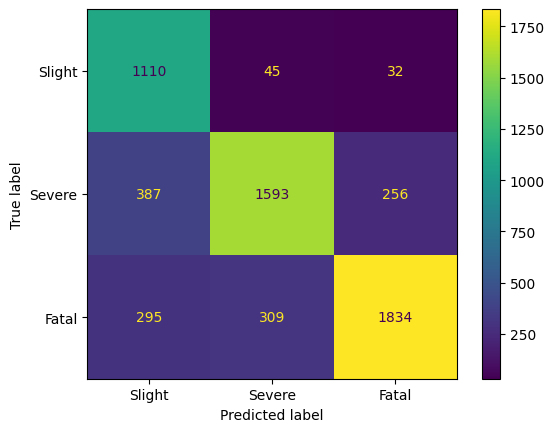

In [36]:
cm= ConfusionMatrixDisplay.from_estimator(best_clf3_Rand_set3 , x_test_tf, y_test_tf,display_labels=['Slight', 'Severe', 'Fatal'])

In [ ]:
print(clf_search3_Rand_3.best_score_, clf_search3_Rand_3.best_params_)

0.8003200675916202 {'classifier__criterion': 'gini', 'classifier__max_depth': 11, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 9, 'classifier__n_estimators': 775, 'classifier__oob_score': False}


###**Model 4**

Validation score: 0.8027245882935384
              precision    recall  f1-score   support

      Slight       0.62      0.93      0.74      1187
     Serious       0.81      0.71      0.76      2236
       Fatal       0.86      0.75      0.80      2438

    accuracy                           0.77      5861
   macro avg       0.77      0.80      0.77      5861
weighted avg       0.80      0.77      0.77      5861


 Balanced accuracy is 0.7979814467576706


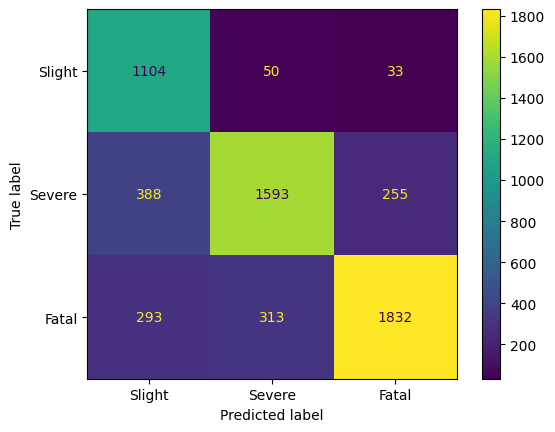

In [57]:
parameters_set4 = {
              'classifier__criterion': ['gini', 'entropy', 'log_loss'],
             
              'classifier__n_estimators': stats.randint(low=100, high= 1000),
              
              'classifier__min_samples_split' : stats.randint(low=2, high= 10),
              'classifier__max_depth' : stats.randint(low=1, high= 20),
              'classifier__min_samples_leaf': stats.randint(low=1, high= 5)
             }


# create the GridSearch function
clf_search3_Rand_4 = RandomizedSearchCV(pipe3_Rand, parameters_set4, scoring= "balanced_accuracy", cv= 5,random_state=0,)
_ =clf_search3_Rand_4.fit(x_train_tf, y_train_tf)

#validation score
val_score = clf_search3_Rand_4.score(x_val_tf, y_val_tf)
print("Validation score:", val_score)

#best estimator set 4
best_clf3_Rand_set4 = clf_search3_Rand_4.best_estimator_
y_pred = best_clf3_Rand_set4.predict(x_test_tf)
print(classification_report(y_test_tf, y_pred, target_names = severity.index))
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, y_pred)}')
forest_4=classification_report(y_test_tf, y_pred, target_names = severity.index)

cm= ConfusionMatrixDisplay.from_estimator(best_clf3_Rand_set4 , x_test_tf, y_test_tf,display_labels=['Slight', 'Severe', 'Fatal'])

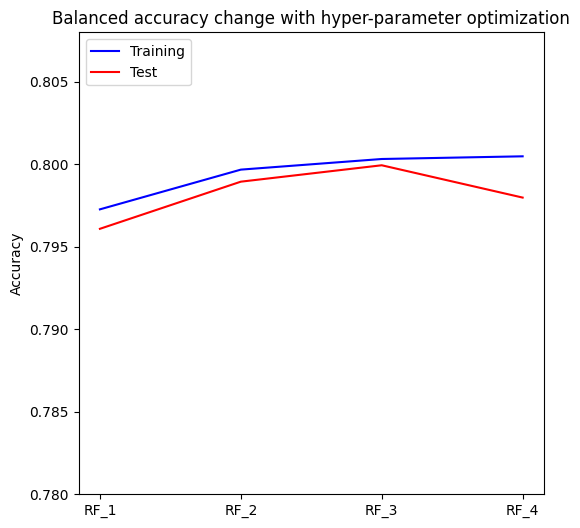

In [59]:
RF_accuracy={'RF_1':(clf_search3_Rand_1.best_score_,balanced_accuracy_score(y_test_tf, best_clf3_Rand_set1.predict(x_test_tf))),
             'RF_2':(clf_search3_Rand_2.best_score_,balanced_accuracy_score(y_test_tf, best_clf3_Rand_set2.predict(x_test_tf))),
             'RF_3':(clf_search3_Rand_3.best_score_,balanced_accuracy_score(y_test_tf, best_clf3_Rand_set3.predict(x_test_tf))),
             'RF_4':(clf_search3_Rand_4.best_score_,balanced_accuracy_score(y_test_tf, best_clf3_Rand_set4.predict(x_test_tf)))
      
}
RF_accuracy = pd.DataFrame.from_dict(RF_accuracy, orient='index', columns=['training','test'])
plt.figure(figsize=(6,6))
plt.plot(np.arange(RF_accuracy.shape[0]),RF_accuracy['training'],label='Training',color='b')
plt.plot(np.arange(RF_accuracy.shape[0]),RF_accuracy['test'],label='Test',color='r')
plt.ylabel('Accuracy')
plt.xticks(np.arange(RF_accuracy.shape[0]),RF_accuracy.index)
plt.title('Balanced accuracy change with hyper-parameter optimization')
plt.ylim([0.78,0.808])
plt.legend(loc=2)
plt.show()

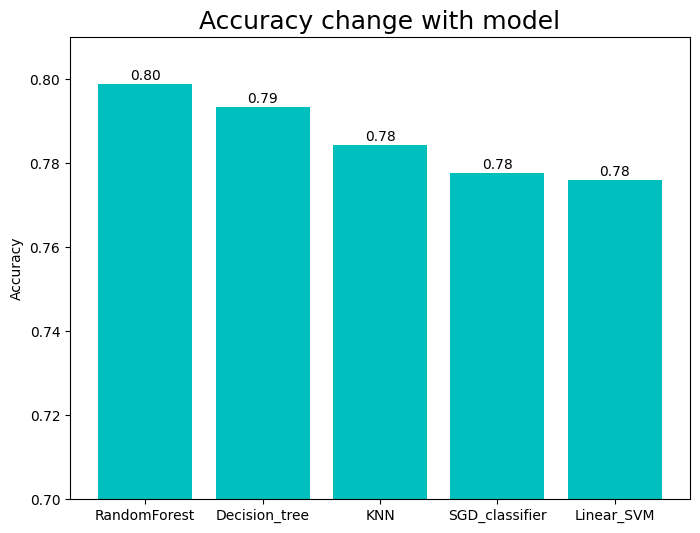

In [ ]:
# define the dictionary
comp_array = {'SGD_classifier': balanced_accuracy_score(y_test_tf, best_clf1.predict(x_test_tf)),
              'Decision_tree': balanced_accuracy_score(y_test_tf, best_clf2.predict(x_test_tf)),
              'RandomForest': balanced_accuracy_score(y_test_tf, best_clf3_Rand_set2.predict(x_test_tf)),
              'Linear_SVM': balanced_accuracy_score(y_test_tf, best_clf4.predict(x_test_tf)),
              'KNN': balanced_accuracy_score(y_test_tf, best_clf5.predict(x_test_tf))}

# create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(comp_array, orient='index', columns=['accuracy']).sort_values(by='accuracy',ascending=False)

plt.figure(figsize=(8,6))
plt.bar(np.arange(5),df['accuracy'],color='c')
plt.xticks(np.arange(5),df.index)
plt.title('Accuracy change with model',fontsize=18)
plt.ylabel('Accuracy')
plt.ylim([0.7,0.81])
for i, acc in enumerate(df['accuracy']):
    plt.text(i, acc+0.001, f'{acc:.2f}', ha='center')
plt.show()


## **Using ANN**

In [39]:
# compute class weights to counteract data imbalance
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight= "balanced", 
    classes = np.unique(y_train_tf), 
    y = y_train_tf)

# we turn the weights into a dictionary
class_weights = dict(zip(np.unique(y_train_tf), class_weights))

###**Simple model with manual hyper-parameter tuning**

184/184 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

       Fatal       0.61      0.90      0.73      1187
     Serious       0.80      0.70      0.75      2236
      Slight       0.85      0.75      0.80      2438

    accuracy                           0.76      5861
   macro avg       0.75      0.78      0.76      5861
weighted avg       0.78      0.76      0.77      5861


 Balanced accuracy is 0.784743924460899


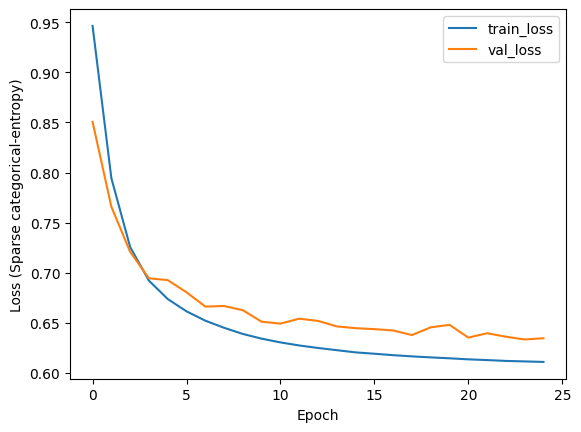

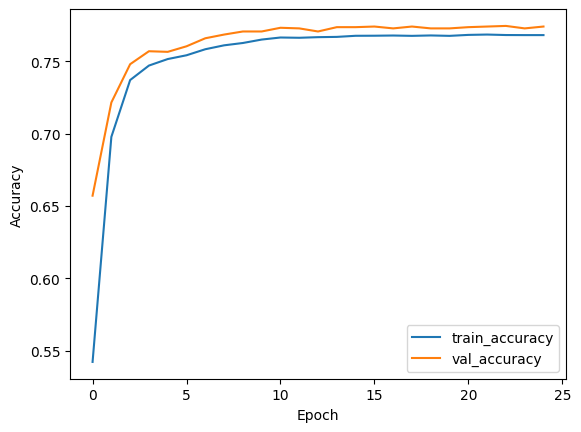

In [40]:
model_1_ANN = models.Sequential()
model_1_ANN.add(layers.Input(shape=(x_train_tf.shape[1],))) 
model_1_ANN.add(layers.Dense(20, activation='relu'))
model_1_ANN.add(layers.Dense(3, activation='softmax'))

model_1_ANN.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])


# fit the model on the training data and evaluate on the test data
his_test=model_1_ANN.fit(x_train_tf, y_train_tf,validation_data=(x_val_tf, y_val_tf),class_weight= class_weights,epochs=25,batch_size=64, verbose=0)

test_predictions_test = model_1_ANN.predict(x_test_tf)

test_predictions_labels = np.argmax(test_predictions_test, axis=1)
print(classification_report(y_test_tf, test_predictions_labels, 
                            target_names=labelEncoder.classes_)) 
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, test_predictions_labels)}')


# Plot training curves for both training and validation data
# loss per epoch
plt.figure()
plt.plot(his_test.history['loss'], label='train_loss')
plt.plot(his_test.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Sparse categorical-entropy)')
plt.legend(loc='upper right')

#accuracy per epoch
plt.figure()
plt.plot(his_test.history['accuracy'], label='train_accuracy')
plt.plot(his_test.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [41]:
weights_25 = model_1_ANN.get_weights()

model_1_ANN.set_weights(weights_25) 
his_test_2=model_1_ANN.fit(x_train_tf, y_train_tf,validation_data=(x_val_tf, y_val_tf),class_weight= class_weights,epochs=2,batch_size=64, verbose=0)
weights_2 = model_1_ANN.get_weights()


model_1_ANN.set_weights(weights_25) 
hist_150=model_1_ANN.fit(x_train_tf, y_train_tf,validation_data=(x_val_tf, y_val_tf),class_weight= class_weights,epochs=150,batch_size=32, verbose=0)
weights_150 = model_1_ANN.get_weights()


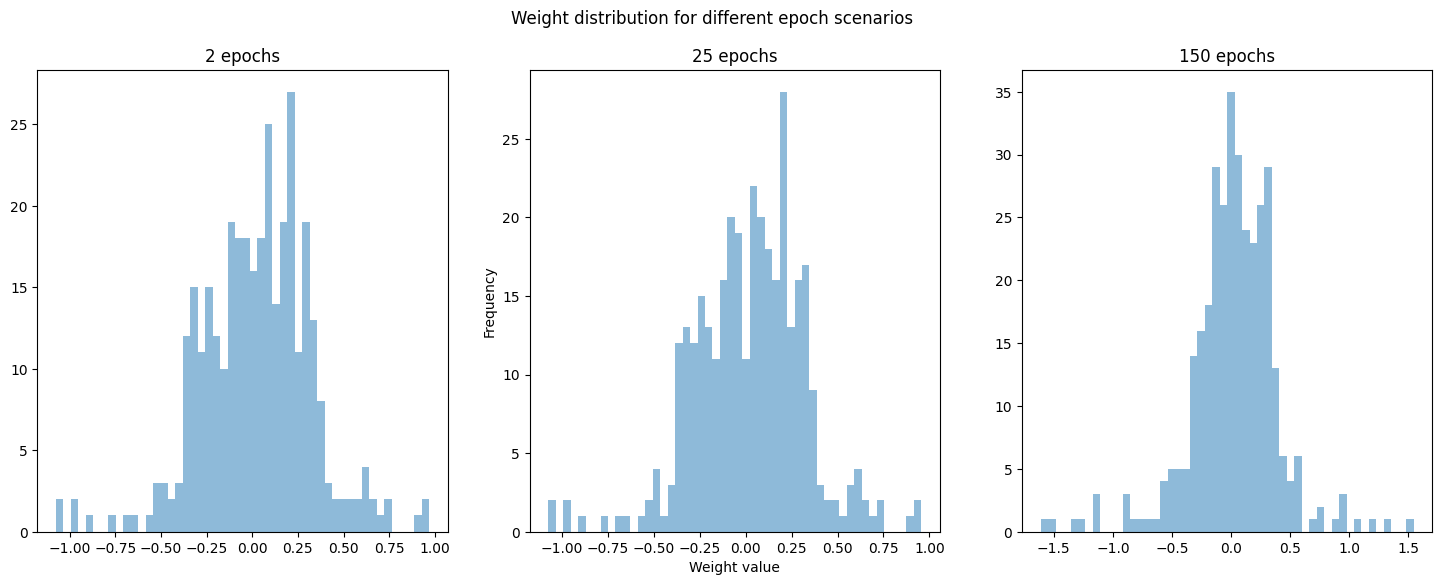

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
fig.suptitle('Weight distribution for different epoch scenarios')
ax[0].hist(np.concatenate([w.flatten() for w in weights_2]), bins=50, alpha=0.5, label='2 epochs')
ax[1].hist(np.concatenate([w.flatten() for w in weights_25]), bins=50, alpha=0.5, label='25 epochs')
ax[2].hist(np.concatenate([w.flatten() for w in weights_150]), bins=50, alpha=0.5, label='150 epochs')
#ax.legend()
ax[1].set_xlabel('Weight value')
ax[1].set_ylabel('Frequency')
ax[0].set_title('2 epochs')
ax[1].set_title('25 epochs')
ax[2].set_title('150 epochs')
plt.show()

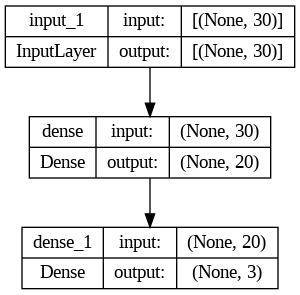

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model_1_ANN, to_file='model.png', show_shapes=True, show_layer_names=True)

###**Model_2_ANN _ adding drop outs to reduce overfit**

In [43]:
def model(num_of_input_features, hidden_layer_nodes,drop, activation='relu'):
    model = models.Sequential()
    model.add(layers.Dense(hidden_layer_nodes, input_dim=num_of_input_features, activation=activation))
    model.add(layers.Dropout(rate=drop))
    model.add(layers.Dense(10, activation=activation))
    model.add(layers.Dropout(rate=drop))
    model.add(layers.Dense(3, activation='softmax')) 
    return model

clf3 = KerasClassifier(
    model=model,
    loss="SparseCategoricalCrossentropy",
    model__hidden_layer_nodes=20,
    num_of_input_features= x_train_tf.shape[1],
    epochs= 50,
    batch_size= 64,
    verbose= 0,   
    optimizer = "SGD",
    optimizer__learning_rate = 0.001
)

params3 = {
    'optimizer__learning_rate': [0.01,0.1,0.3,1],
    'model__hidden_layer_nodes': [10,20,30,50],
    'batch_size':[16,32,48],
    'epochs': [10,20,30,50],
    'model__drop':[0.1,0.2,0.3]
  
}
# define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
gs_3= RandomizedSearchCV(clf3, params3, scoring='balanced_accuracy', verbose=True,random_state=0,cv=3)

history=gs_3.fit(x_train_tf, y_train_tf,validation_data=(x_val_tf, y_val_tf),callbacks=[early_stopping])



Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [46]:
print(gs_3.best_score_, gs_3.best_params_)

0.7978819913341701 {'optimizer__learning_rate': 0.3, 'model__hidden_layer_nodes': 50, 'model__drop': 0.2, 'epochs': 30, 'batch_size': 32}
0.7978819913341701 {'optimizer__learning_rate': 0.3, 'model__hidden_layer_nodes': 50, 'model__drop': 0.2, 'epochs': 30, 'batch_size': 32}


184/184 [==============================] - 1s 4ms/step

 Balanced accuracy is 0.7931033221988093


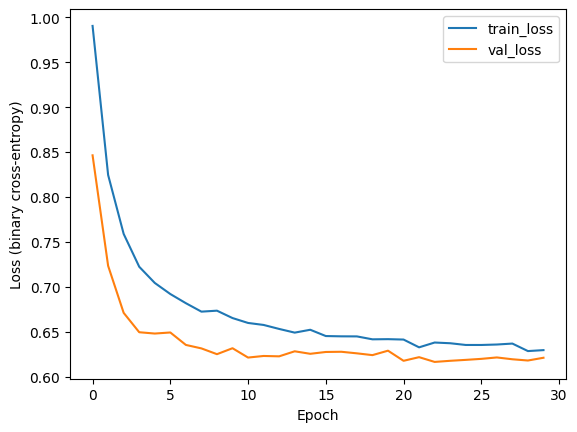

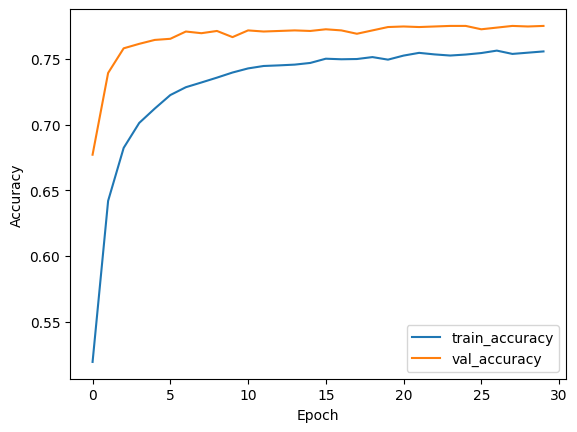

In [47]:

model_2_ANN=model(x_train_tf.shape[1],50,0.2)
model_2_ANN.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])
hist_2=model_2_ANN.fit(x_train_tf, y_train_tf,validation_data=(x_val_tf, y_val_tf),class_weight= class_weights,epochs=30,batch_size=32, verbose=0)
predictions_ANN_2= model_2_ANN.predict(x_test_tf)

predictions_ANN_2 = np.argmax(predictions_ANN_2, axis=1)
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, predictions_ANN_2)}')


# Plot training curves for both training and validation data
# loss per epoch
plt.figure()
plt.plot(hist_2.history['loss'], label='train_loss')
plt.plot(hist_2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (binary cross-entropy)')
plt.legend(loc='upper right')

#accuracy per epoch
plt.figure()
plt.plot(hist_2.history['accuracy'], label='train_accuracy')
plt.plot(hist_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

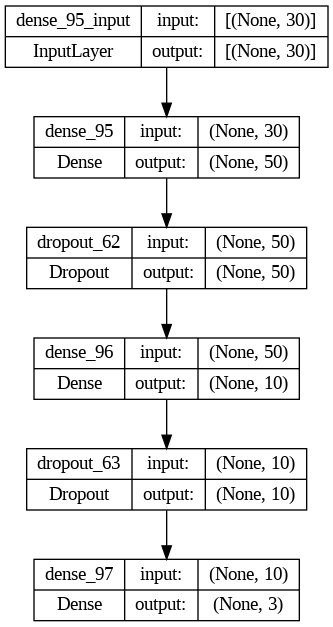

In [48]:
plot_model(model_2_ANN, to_file='model.png', show_shapes=True, show_layer_names=True)

###**Model_ANN_3 building the final complex model (Final selected Sequential model)**

In [49]:
def model_2(num_of_input_features, hidden_layer_nodes,drop, activation='relu'):
    model = models.Sequential()
    model.add(layers.Dense(hidden_layer_nodes, input_dim=num_of_input_features, activation=activation))
    model.add(layers.Dropout(rate=drop))
    model.add(layers.Dense(20, activation=activation))
    model.add(layers.Dropout(rate=drop))
    model.add(layers.Dense(10, activation=activation))
    model.add(layers.Dropout(rate=drop))
    model.add(layers.Dense(3, activation='softmax')) 
    return model

clf_4 = KerasClassifier(
    model=model_2,
    loss="SparseCategoricalCrossentropy",
    model__hidden_layer_nodes=20,
    num_of_input_features= x_train_tf.shape[1],
    epochs= 50,
    batch_size= 64,
    verbose= 0,   
    optimizer = "SGD",
    optimizer__learning_rate = 0.001
)

params3 = {
    'optimizer__learning_rate': [0.01,0.1,0.3,1],
    'model__hidden_layer_nodes': [10,20,30,50],
    'batch_size':[16,32,48],
    'epochs': [10,20,30,50],
    'model__drop':[0.1,0.2,0.3]
  
}
# define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
gs_4= RandomizedSearchCV(clf_4, params3, scoring='balanced_accuracy', verbose=True,random_state=0,cv=3)

history=gs_4.fit(x_train_tf, y_train_tf,validation_data=(x_val_tf, y_val_tf),callbacks=[early_stopping])

print(gs_4.best_score_, gs_4.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.7945950373972122 {'optimizer__learning_rate': 0.3, 'model__hidden_layer_nodes': 20, 'model__drop': 0.3, 'epochs': 50, 'batch_size': 48}


184/184 [==============================] - 0s 1ms/step

 Balanced accuracy is 0.7945607369688967


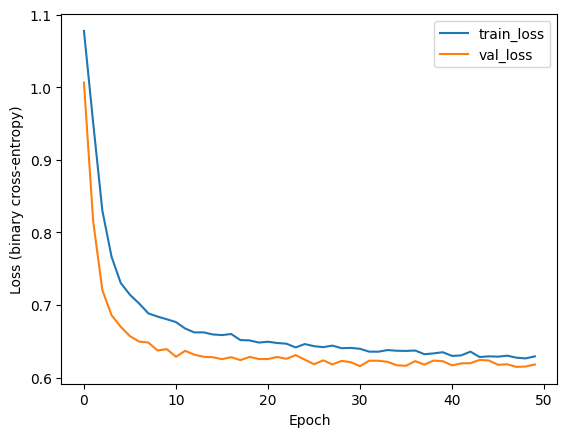

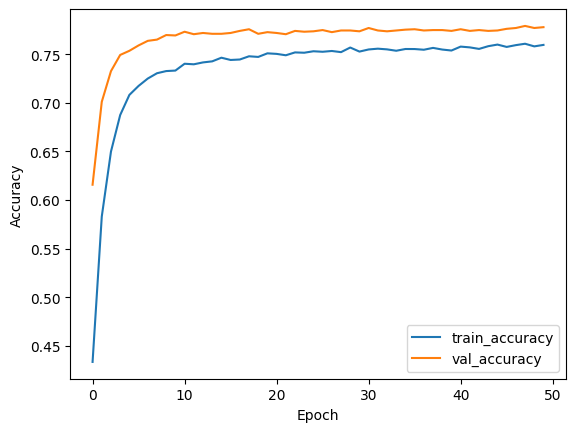

In [51]:
model_3_ANN=model_2(x_train_tf.shape[1],20,0.1)
model_3_ANN.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])
hist_4=model_3_ANN.fit(x_train_tf, y_train_tf,validation_data=(x_val_tf, y_val_tf),class_weight= class_weights,epochs=50,batch_size=48, verbose=0)
predictions_ANN_3= model_3_ANN.predict(x_test_tf)

predictions_ANN_3 = np.argmax(predictions_ANN_3, axis=1)
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, predictions_ANN_3)}')


# Plot training curves for both training and validation data
# loss per epoch
plt.figure()
plt.plot(hist_4.history['loss'], label='train_loss')
plt.plot(hist_4.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (binary cross-entropy)')
plt.legend(loc='upper right')

#accuracy per epoch
plt.figure()
plt.plot(hist_4.history['accuracy'], label='train_accuracy')
plt.plot(hist_4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

      Slight       0.61      0.94      0.74      1187
     Serious       0.82      0.70      0.75      2236
       Fatal       0.86      0.75      0.80      2438

    accuracy                           0.77      5861
   macro avg       0.76      0.79      0.76      5861
weighted avg       0.79      0.77      0.77      5861

The balanced accuracy score is 0.795



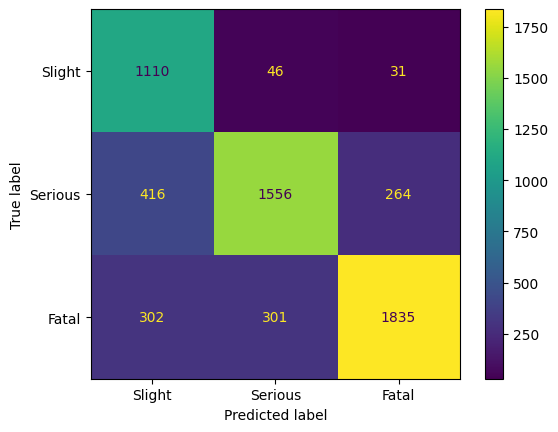

In [72]:
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_tf,predictions_ANN_3, 
                            target_names= ['Slight','Serious','Fatal'])) 
print(f'The balanced accuracy score is {balanced_accuracy_score(y_test_tf,predictions_ANN_3):.3f}\n')
cm = confusion_matrix(y_test_tf,predictions_ANN_3) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= ['Slight','Serious','Fatal']) 
disp.plot()
plt.show()


###**Convolusion Neural Networks**

In [ ]:
# Define the CNN model

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

def create_model_CNN(nodes,dp):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_tf_reshape.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(nodes, activation='relu'))
    model.add(Dropout(dp))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Convert dataframes to numpy arrays and reshape them
x_train_tf_reshape = x_train_tf.to_numpy().reshape(x_train_tf.shape[0], x_train_tf.shape[1], 1)
x_val_tf_reshape = x_val_tf.to_numpy().reshape(x_val_tf.shape[0], x_val_tf.shape[1], 1)
y_train_tf_encoded = to_categorical(y_train_tf, num_classes=3)
y_val_tf_encoded = to_categorical(y_val_tf, num_classes=3)

# Wrap the model using KerasClassifier
clf_CNN= KerasClassifier(model=create_model_CNN, 
                         epochs=30, #
                         batch_size=16, 
                         model__nodes=10,
                         model__dp=0.2,
                         verbose=0)

# Define the hyperparameters to tune
params = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 50],
    'optimizer': ['adam', 'SGD', 'RMSprop'],
    'model__nodes':[10,20,30],
    'model__dp':[0.1,0.2,0.3,0.5]
}

# Perform randomized search for hyperparameter tuning
gs_CNN = RandomizedSearchCV(clf_CNN, params, scoring='accuracy', cv=3)
history_CNN = gs_CNN.fit(x_train_tf_reshape, y_train_tf_encoded, validation_data=(x_val_tf_reshape,y_val_tf_encoded),class_weight= class_weights)



In [ ]:
print(gs_CNN.best_score_, gs_CNN.best_params_)

0.7706311504769676 {'optimizer': 'adam', 'model__nodes': 10, 'model__dp': 0.3, 'epochs': 50, 'batch_size': 32}


In [ ]:
print(gs_CNN.best_score_, gs_CNN.best_params_)

y_test_tf_encoded = to_categorical(y_test_tf, num_classes=3)
x_test_tf_reshape=x_test_tf.to_numpy().reshape(x_test_tf.shape[0], x_test_tf.shape[1], 1)

model_CNN=create_model_CNN(30,0.1)
model_CNN.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])
hist_CNN=model_CNN.fit(x_train_tf_reshape, y_train_tf_encoded, validation_data=(x_val_tf_reshape,y_val_tf_encoded),class_weight= class_weights,epochs=50,batch_size=64, verbose=0)
test_predictions_CNN = model_CNN.predict(x_test_tf_reshape)

test_predictions_CNN = np.argmax(test_predictions_CNN, axis=1)
print(f'\n Balanced accuracy is {balanced_accuracy_score(y_test_tf, test_predictions_CNN)}')


0.7706311504769676 {'optimizer': 'adam', 'model__nodes': 10, 'model__dp': 0.3, 'epochs': 50, 'batch_size': 32}
184/184 [==============================] - 0s 2ms/step

 Balanced accuracy is 0.7916028010953428


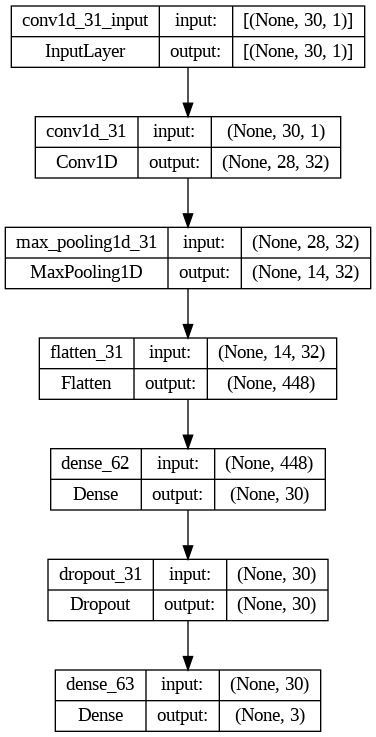

In [ ]:
plot_model(model_CNN, to_file='model.png', show_shapes=True, show_layer_names=True)

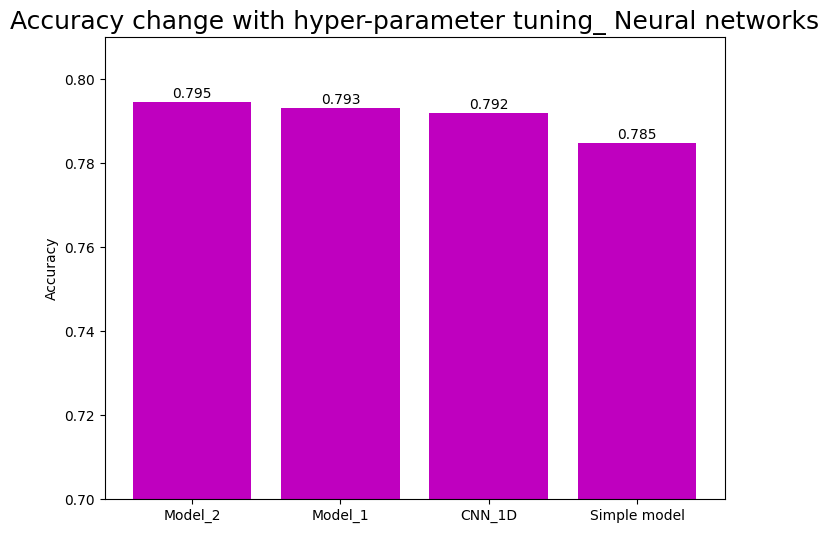

In [66]:
# define the dictionary
ANN_array = {'Simple model': balanced_accuracy_score(y_test_tf, test_predictions_labels),
              'Model_1': balanced_accuracy_score(y_test_tf, predictions_ANN_2),
              'Model_2': balanced_accuracy_score(y_test_tf, predictions_ANN_3),
             'CNN_1D': 0.792
            
              }

# create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(ANN_array, orient='index', columns=['accuracy']).sort_values(by='accuracy',ascending=False)

plt.figure(figsize=(8,6))
plt.bar(np.arange(4),df['accuracy'],color='m')
plt.xticks(np.arange(4),df.index)
plt.title('Accuracy change with hyper-parameter tuning_ Neural networks',fontsize=18)
plt.ylabel('Accuracy')
plt.ylim([0.7,0.81])
for i, acc in enumerate(df['accuracy']):
    plt.text(i, acc+0.001, f'{acc:.3f}', ha='center')
plt.show()